# MNS 5
    Dominik Krzemiński

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def euler(f_func, x_0, t_max, dt, **params):
    t = np.arange(0, t_max, dt)
    n = len(t)
    x = np.zeros((n,1))
    x[0] = x_0
    for i in range(1, n):
        x[i] = x[i-1] + f_func(x[i-1], t[i-1], **params)*dt
    return x

def expand_kwargs(kwargsdict, i):
    new_kwarg = {}
    for k, val in kwargsdict.items():
        if np.isscalar(val) or hasattr(val, '__call__'): # we skip scalars and functions
            new_kwarg[k] = val
            continue
        new_kwarg[k] = val[i]
    return new_kwarg

def euler_par(f_func, x_0, timevec, **params):
    dt = timevec[-1] - timevec[-2]
    n = len(timevec)
    x = np.zeros((n,1))
    x[0] = x_0
    for i in range(1, n):
        kw = expand_kwargs(params, i)
        x[i] = x[i-1] + f_func(x[i-1], timevec[i-1], **kw)*dt
    return x.T

### 1. Potassium channel

In [3]:
def alpha_n(v):
    return (0.01*(v + 55))/(1 - np.exp(-0.1*(v+55)))

def beta_n(v):
    return 0.125*np.exp(-0.0125*(v + 65))

def dndt(n, t, v=0, alpha=alpha_n, beta=beta_n):
    return alpha(v)*(1-n)-beta(v)*n

def ik(v, tv, n0, gk=36e-9, ek=-77):
    nvec = euler_par(dndt, n0, tv, v=v, alpha=alpha_n, beta=beta_n)
    return gk*(nvec**4)*(v-ek)

In [4]:
vvec = np.linspace(-150, 150,100)

tau_n = lambda v: (alpha_n(v) + beta_n(v))**-1
n_inf = lambda v: alpha_n(v)*(alpha_n(v) + beta_n(v))**-1

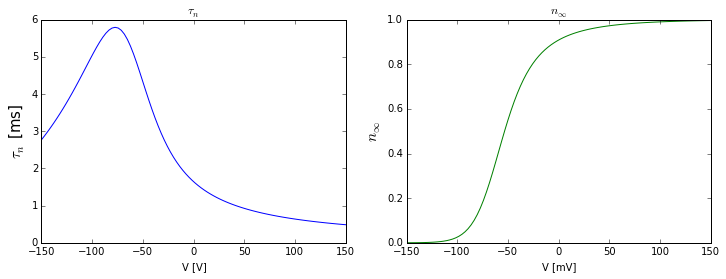

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(vvec, tau_n(vvec))
plt.xlabel('V [V]')
plt.ylabel(r'$\tau_n$ [ms]', fontsize=15)
plt.title(r'$\tau_n$')

plt.subplot(1,2,2)
plt.plot(vvec, n_inf(vvec), 'g')
plt.xlabel('V [mV]')
plt.ylabel(r'$n_{\infty}$', fontsize=15)
plt.title(r'$n_{\infty}$')

plt.show()

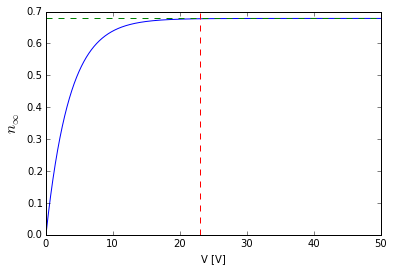

In [6]:
dt = 1./200
t_max = 50
tv = np.arange(0, t_max, dt)
nvec = euler_par(dndt, 0, tv, alpha=alpha_n, beta=beta_n, v=-40)
plt.plot(tv, nvec.T)
plt.xlabel('V [V]')
plt.ylabel(r'$n_{\infty}$', fontsize=15)
plt.axvline(x=23, color='r', linestyle='--')
plt.axhline(y=.68, color='g', linestyle='--')
plt.show()

Plot above shows that numerical values I received agrees with given values in a problem set (dashed lines).

c)

In [7]:
n_0 = 0.3177
vvec = np.piecewise(tv, [tv < 2, tv >= 2], [lambda x: -65, lambda x: -40])
ikvec = ik(vvec, tv, n_0)

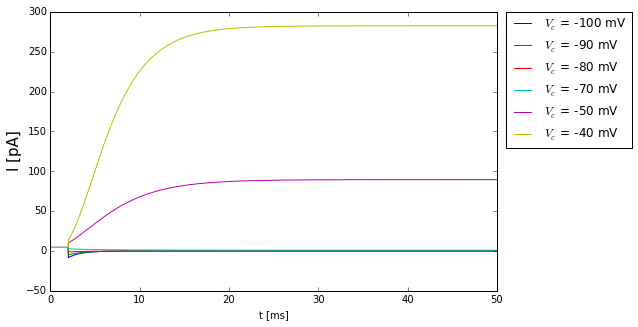

In [8]:
n_0 = 0.3177
v_c = np.array([-100, -90, -80, -70, -50, -40])
i_fin = np.zeros(len(v_c))
plt.figure(figsize=(8, 5))
for e, vc in enumerate(v_c):
    vvec = np.piecewise(tv, [tv < 2, tv >= 2], [lambda x: -65, lambda x: vc])
    ikvec = ik(vvec, tv, n_0)
    plt.plot(tv, ikvec.T*1e9, label='$V_c$ = {} mV'.format(vc))
plt.xlabel('t [ms]')
plt.ylabel(r'I [pA]', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

From the plot above we can see that voltages higher than potential -65 mV cause positive current flow and lower respectively negative. When we hyperpolarize the cell the value of current changes to negative which means influx of the ions from the cell. Then more and more channels are closed. In case of depolarization potassium channels open and we observe rapid outward current and outflux of ions (to equal the gradient).

d)

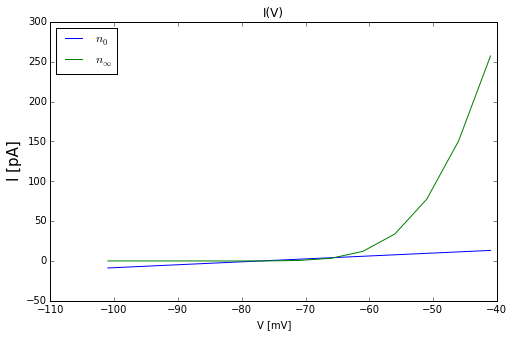

In [9]:
gk, ek = 36e-9, -77
v_c = np.arange(-101,-40,5)
plt.figure(figsize=(8,5))
plt.plot(v_c, gk*(n_0**4)*(v_c-ek)*1e9, label='$n_0$')
plt.plot(v_c, gk*(n_inf(v_c)**4)*(v_c-ek)*1e9, label='$n_{\infty}$')
plt.title('I(V)')
plt.xlabel('V [mV]')
plt.ylabel(r'I [pA]', fontsize=15)
plt.legend(loc=2)
plt.show()

For $n_0$ we see linear relation of I and V. It's due to the fact that it takes some time for gates to answer to the voltage change. For $n_{\infty}$ curve (green line) is linear for values less than about -65 mV and later becomes nonlinear. It is possible to explain by looking at $n_{\infty}$ plot from 1 a). For values higher than that threshold more and more gates become open.

### 2. Sodium ion channel

a)

In [10]:
def alpha_m(v):
    return (0.1*(v + 40))/(1 - np.exp(-0.1*(v+40)))

def alpha_h(v):
    return 0.07*np.exp(-0.05*(v+65))

def beta_m(v):
    return 4*np.exp(-0.0556*(v + 65))

def beta_h(v):
    return (1+np.exp(-0.1*(v + 35)))**-1

In [11]:
tau_m = lambda v: (alpha_m(v) + beta_m(v))**-1
m_inf = lambda v: alpha_m(v)*(alpha_m(v) + beta_m(v))**-1

tau_h = lambda v: (alpha_h(v) + beta_h(v))**-1
h_inf = lambda v: alpha_h(v)*(alpha_h(v) + beta_h(v))**-1

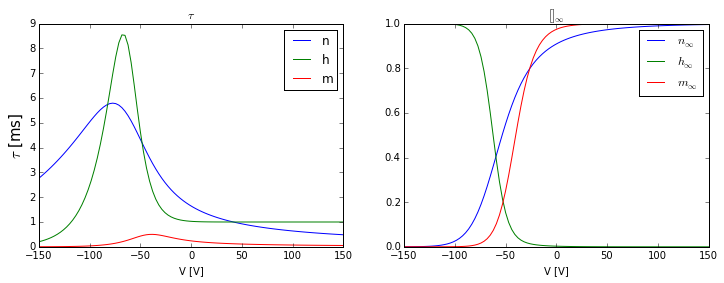

In [12]:
vvec = np.linspace(-150, 150,100)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(vvec, tau_n(vvec), label=r'n')
plt.plot(vvec, tau_h(vvec), label=r'h')
plt.plot(vvec, tau_m(vvec), label=r'm')
plt.xlabel('V [V]')
plt.ylabel(r'$\tau$ [ms]', fontsize=15)
plt.title(r'$\tau$')
plt.legend()

plt.subplot(1,2,2)
plt.plot(vvec, n_inf(vvec), label=r'$n_{\infty}$')
plt.plot(vvec, h_inf(vvec), label=r'$h_{\infty}$')
plt.plot(vvec, m_inf(vvec), label=r'$m_{\infty}$')
plt.xlabel('V [V]')
plt.title(r'$[ ]_{\infty}$')
plt.legend()
plt.show()

From plot above we see that voltage dynamics of $n_{\infty}$ is a bit similar to $m_{\infty}$. For positive values of voltage $m$ saturates to 1 so it's activated by depolarization, and $h$ is deactivated. From the time of saturation we may conclude that m is fast variable and m and n are slow ones.

b)

In [13]:
def ina(v, tv, m0, h0, gna=120e-9, ena=50):
    mvec = euler_par(dndt, m0, tv, v=v, alpha=alpha_m, beta=beta_m)
    hvec = euler_par(dndt, h0, tv, v=v, alpha=alpha_h, beta=beta_h)
    return gna*(mvec**3)*hvec*(v-ena)

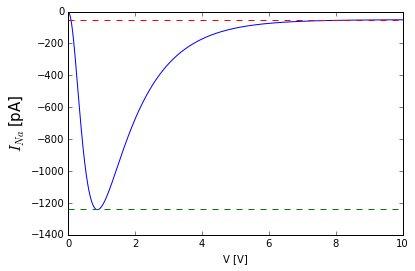

In [14]:
m_0 = 0.0529
h_0 = 0.5961

inavec = ina(-20, tv, m_0, h_0)
plt.plot(tv, inavec.T*1e9)
plt.xlabel('V [V]')
plt.ylabel(r'$I_{Na}$ [pA]', fontsize=15)
plt.xlim([0,10])
plt.axhline(y=-50, color='r', linestyle='--')
plt.axhline(y=-1240, color='g', linestyle='--')
plt.show()

Once again plot above shows that numerical values I received agrees with given values in a problem set (dashed lines).

c)

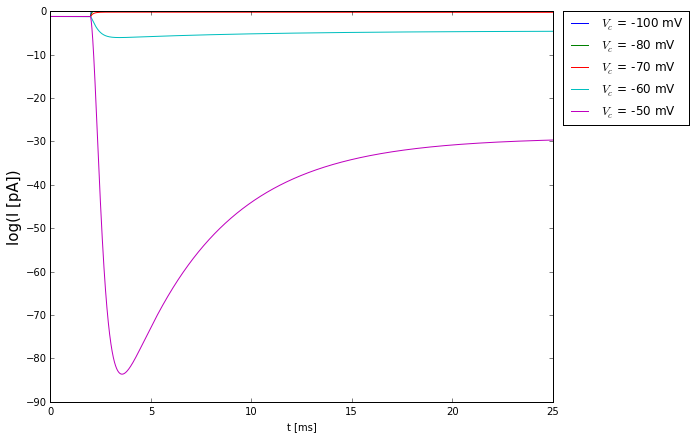

In [15]:
tv = np.arange(0, 25, dt)
v_c = [-100, -80, -70, -60, -50]
i_fin = np.zeros(len(v_c))
plt.figure(figsize=(9, 7))
for e, vc in enumerate(v_c):
    vvec = np.piecewise(tv, [tv < 2, tv >= 2], [lambda x: -65, lambda x: vc])
    inavec = ina(vvec, tv, m_0, h_0)
    plt.plot(tv, inavec.T*1e9, label='$V_c$ = {} mV'.format(vc))
    i_fin[e] = inavec.ravel()[-1]
#plt.yscale('symlog')
plt.xlabel('t [ms]')
plt.ylabel(r'log(I [pA])', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

In that case I used logarithic scale, because otherwise plot wasn't very clear. For hyperpolarization we see big influx of Na ions inside the cell. Also in that case we can observe that current reaches constant value much slower than potassium. In terms of depolarization outflux of Na is very small comparing to the previous case.

d)

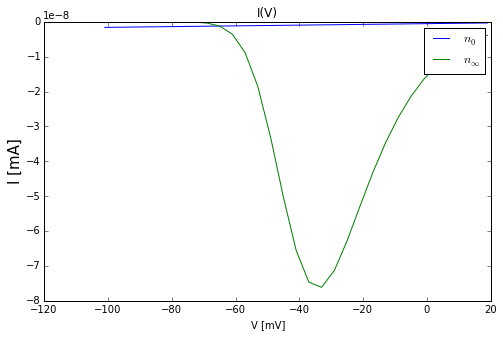

In [35]:
gna, ena = 120e-9, 50
v_c = np.arange(-101,20,4)
plt.figure(figsize=(8,5))
plt.plot(v_c, gna*(m_0**3)*h_0*(v_c-ena), label='$n_0$')
plt.plot(v_c, gna*(m_inf(v_c)**3)*h_inf(v_c)*(v_c-ena), label='$n_{\infty}$')
plt.title('I(V)')
plt.xlabel('V [mV]')
plt.ylabel(r'I [mA]', fontsize=15)
plt.legend()
plt.show()

Comparing to previous plot we have similar situaltion for $n_0$ but in case of $n_{\infty}$ we have influance of two parameters on sodium channel m and h. We see that at the edges green curve is almost zero which can be explained by looking at plots from 2 a). We see there that for highly negative and positive voltages either h or m is zero. Multiplying those probabilities we receive also zero. Only for values about -100 to 0 mV we get current flow what also agrees with curves m and h from 2 a).